# Homework 3 - Gary Gregg

My apologies, but I did not get this exactly right.  The problem asked for "station count averages," and what I have here are "station count totals."  For the stated goal, I feel that these plots are note quite as interpretable, as they don't give an intuitive feel for how many bikes should be moved between stations on a daily basis.  I could not get pandas to give me a mean count of values for either from_station_id or to_station_id in a way that was useable for building a dataframe that the graphing functions could use.  I experimented mightily with the 'groupby' function, and looked carefully at the examples in the lab.  But I didn't get it.  I had to settle for pd.value_counts() (in create_count_frame(), below).  After many hours I have to give up and move on to this week's homework for DATA 558.

Import required packages, and use matplotlib inline.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# The following ensures that the plots are in the notebook
%matplotlib inline
# We'll also use capabilities in numpy
import numpy as np

Declare and define a function to clean rows.

In [2]:
def clean_rows(df, indexes):
    """
    Removes from df all rows with the specified indexes
    :param pd.DataFrame or pd.Series df:
    :param list-of-str indexes
    :return pd.DataFrame or pd.Series:
    """
    for idx in indexes:
        df = df[df.index != idx]
    return df

Declare and define a function to create a value count data frame.

In [3]:
def create_count_frame(df):
    """
    Determines value counts for the 'from' and 'to' station IDs, and cleans the Pronto shop rows.
    :param df.DataFrame
    :return A data frame with 'from' and 'to' value counts, indexed by the station ID.
    """
    shop = 'Pronto shop'
    from_counts = clean_rows(pd.value_counts(df.from_station_id), [shop])
    to_counts = clean_rows(pd.value_counts(df.to_station_id), [shop])
    return pd.DataFrame({'From': from_counts.sort_index(), 'To': to_counts.sort_index()})

Declare and define a function to make a two-bar plot.

In [4]:
def plot_bar2(df_counts, day_name):
    """
    Plotting two variables as a bar chart
    """
    n_groups = len(df_counts.index)
    index = np.arange(n_groups)  # The "raw" x-axis of the bar plot
    # fig = plt.figure(figsize = (12, 8))  # Controls global properties of the bar plot

    #VVVV Changed to do two plots
    bar_width = 0.35  # Width of the bars
    opacity = 0.6  # How transparent the bars are
    rects1 = plt.bar(index, df_counts.From, bar_width,
                     alpha = opacity,
                     color = 'b',
                     label = 'From')
    rects2 = plt.bar(index + bar_width, df_counts.To, bar_width,
                     alpha = opacity,
                     color = 'r',
                     label = 'To')
    plt.xticks(index + bar_width / 2, df_counts.index)
    _, labels = plt.xticks()  # Get the new labels of the plot
    plt.setp(labels, rotation=90)  # Rotate labels to make them readable
    plt.legend()
    #^^^^ Changed to do two plots

    plt.xlabel('Station')
    plt.ylabel('Counts')
    plt.title(day_name + ' Station Counts')
    plt.show()

Declare and define a function to make a series of stacked two-bar plots.

In [5]:
def show_plots(df_counts_by_day_of_week):
    num_columns = len(df_counts_by_day_of_week)
    idx = 0
    for df_counts in df_counts_by_day_of_week:
        idx = idx + 1
        fig = plt.figure(figsize = (12, 30))  # Controls global properties of the bar plot
        plt.subplot(num_columns, 1, idx)
        plot_bar2(df_counts, df_counts.name)

Read the 2015 Pronto trip data. Add a new column for the start day of the week. Note: this is time consuming.

In [6]:
df = pd.read_csv("2015_trip_data.csv")
df['start_day_of_week'] = [pd.to_datetime(time).dayofweek for time in df.starttime]

Declare and initialize a tuple of days.  Cycle for each day.  Create a new to-from count dataframe, and add the name of the week as a name in the dataframe.  Append the dataframe to a list of dataframes, and increment the day index.  Finally, show plots of each count dataframe.

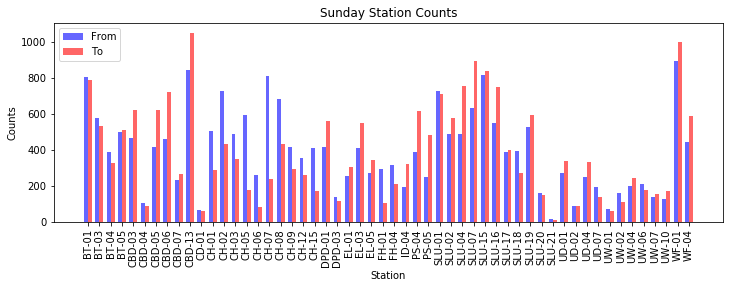

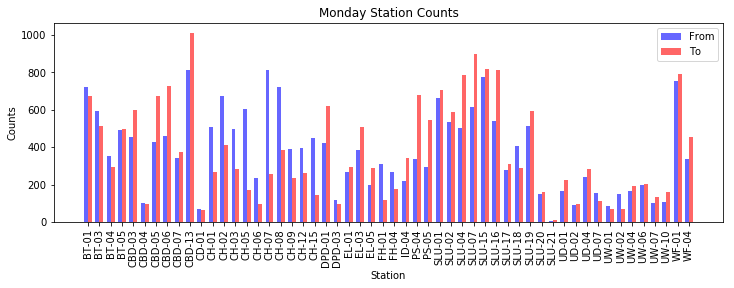

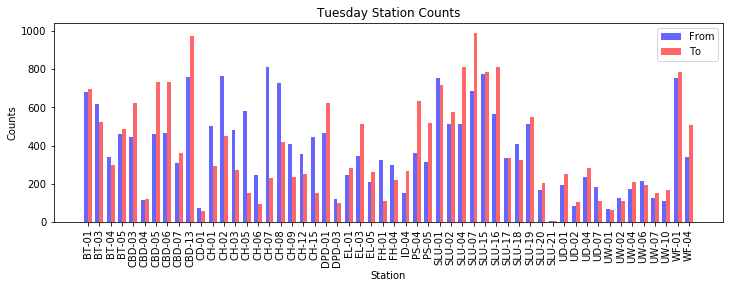

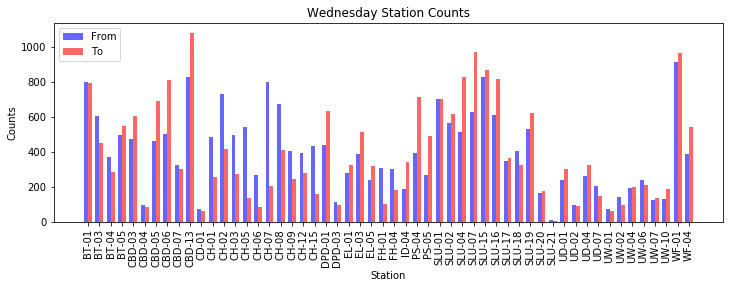

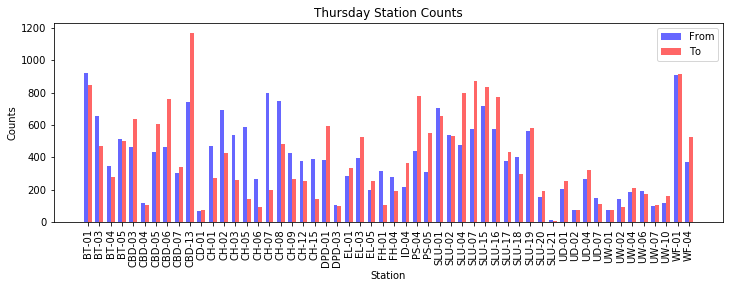

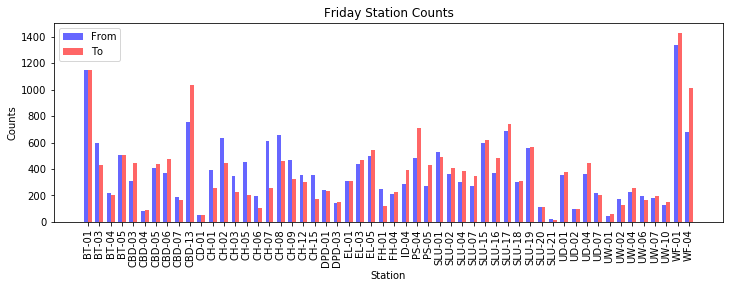

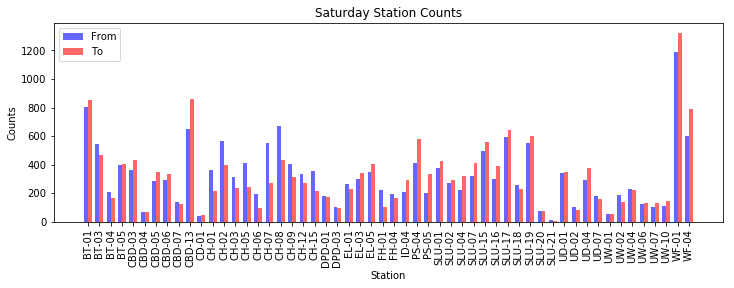

In [7]:
days = ("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")
df_counts = []
idx = 0
for day in days:
    new_df_count = create_count_frame(df[df.start_day_of_week == idx])
    new_df_count.name = days[idx]
    df_counts.append(new_df_count)
    idx = idx + 1
show_plots(df_counts)